In [11]:
import itertools
import random
import numpy as np
import pandas as pd
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from ast import literal_eval

In [20]:
data_path = '../parsed/lemmatized.csv'
nrows = 10000
model_name = "word2vecTexts.model"

In [13]:
df = pd.read_csv(data_path, parse_dates=['dtm'], converters={"tags": literal_eval}, nrows=nrows)

In [14]:
unique_words = set()
for text in df["text"]:
    unique_words.update(text.split())

In [15]:
len(unique_words)

166895

In [49]:
# Genism word2vec requires that a format of ‘list of lists’ for training where every 
# document is contained in a list and every list contains lists of tokens of that document.
arr_texts = df["text"].str.split()
print(len(arr_texts))

10000


In [31]:
model = Word2Vec(sentences=arr_texts, vector_size=100, window=5, min_count=1, workers=12)
model.save(model_name)

In [34]:
model = Word2Vec.load(model_name)
list_vectors = []
for word in unique_words:
    
    list_vectors.append(model.wv[word])
print(len(list_vectors))

166895


In [35]:
# reduce dimensions
vector_embedded = TSNE(n_components=2).fit_transform(list_vectors)

In [36]:
x = vector_embedded[:, 0]
y = vector_embedded[:, 1]

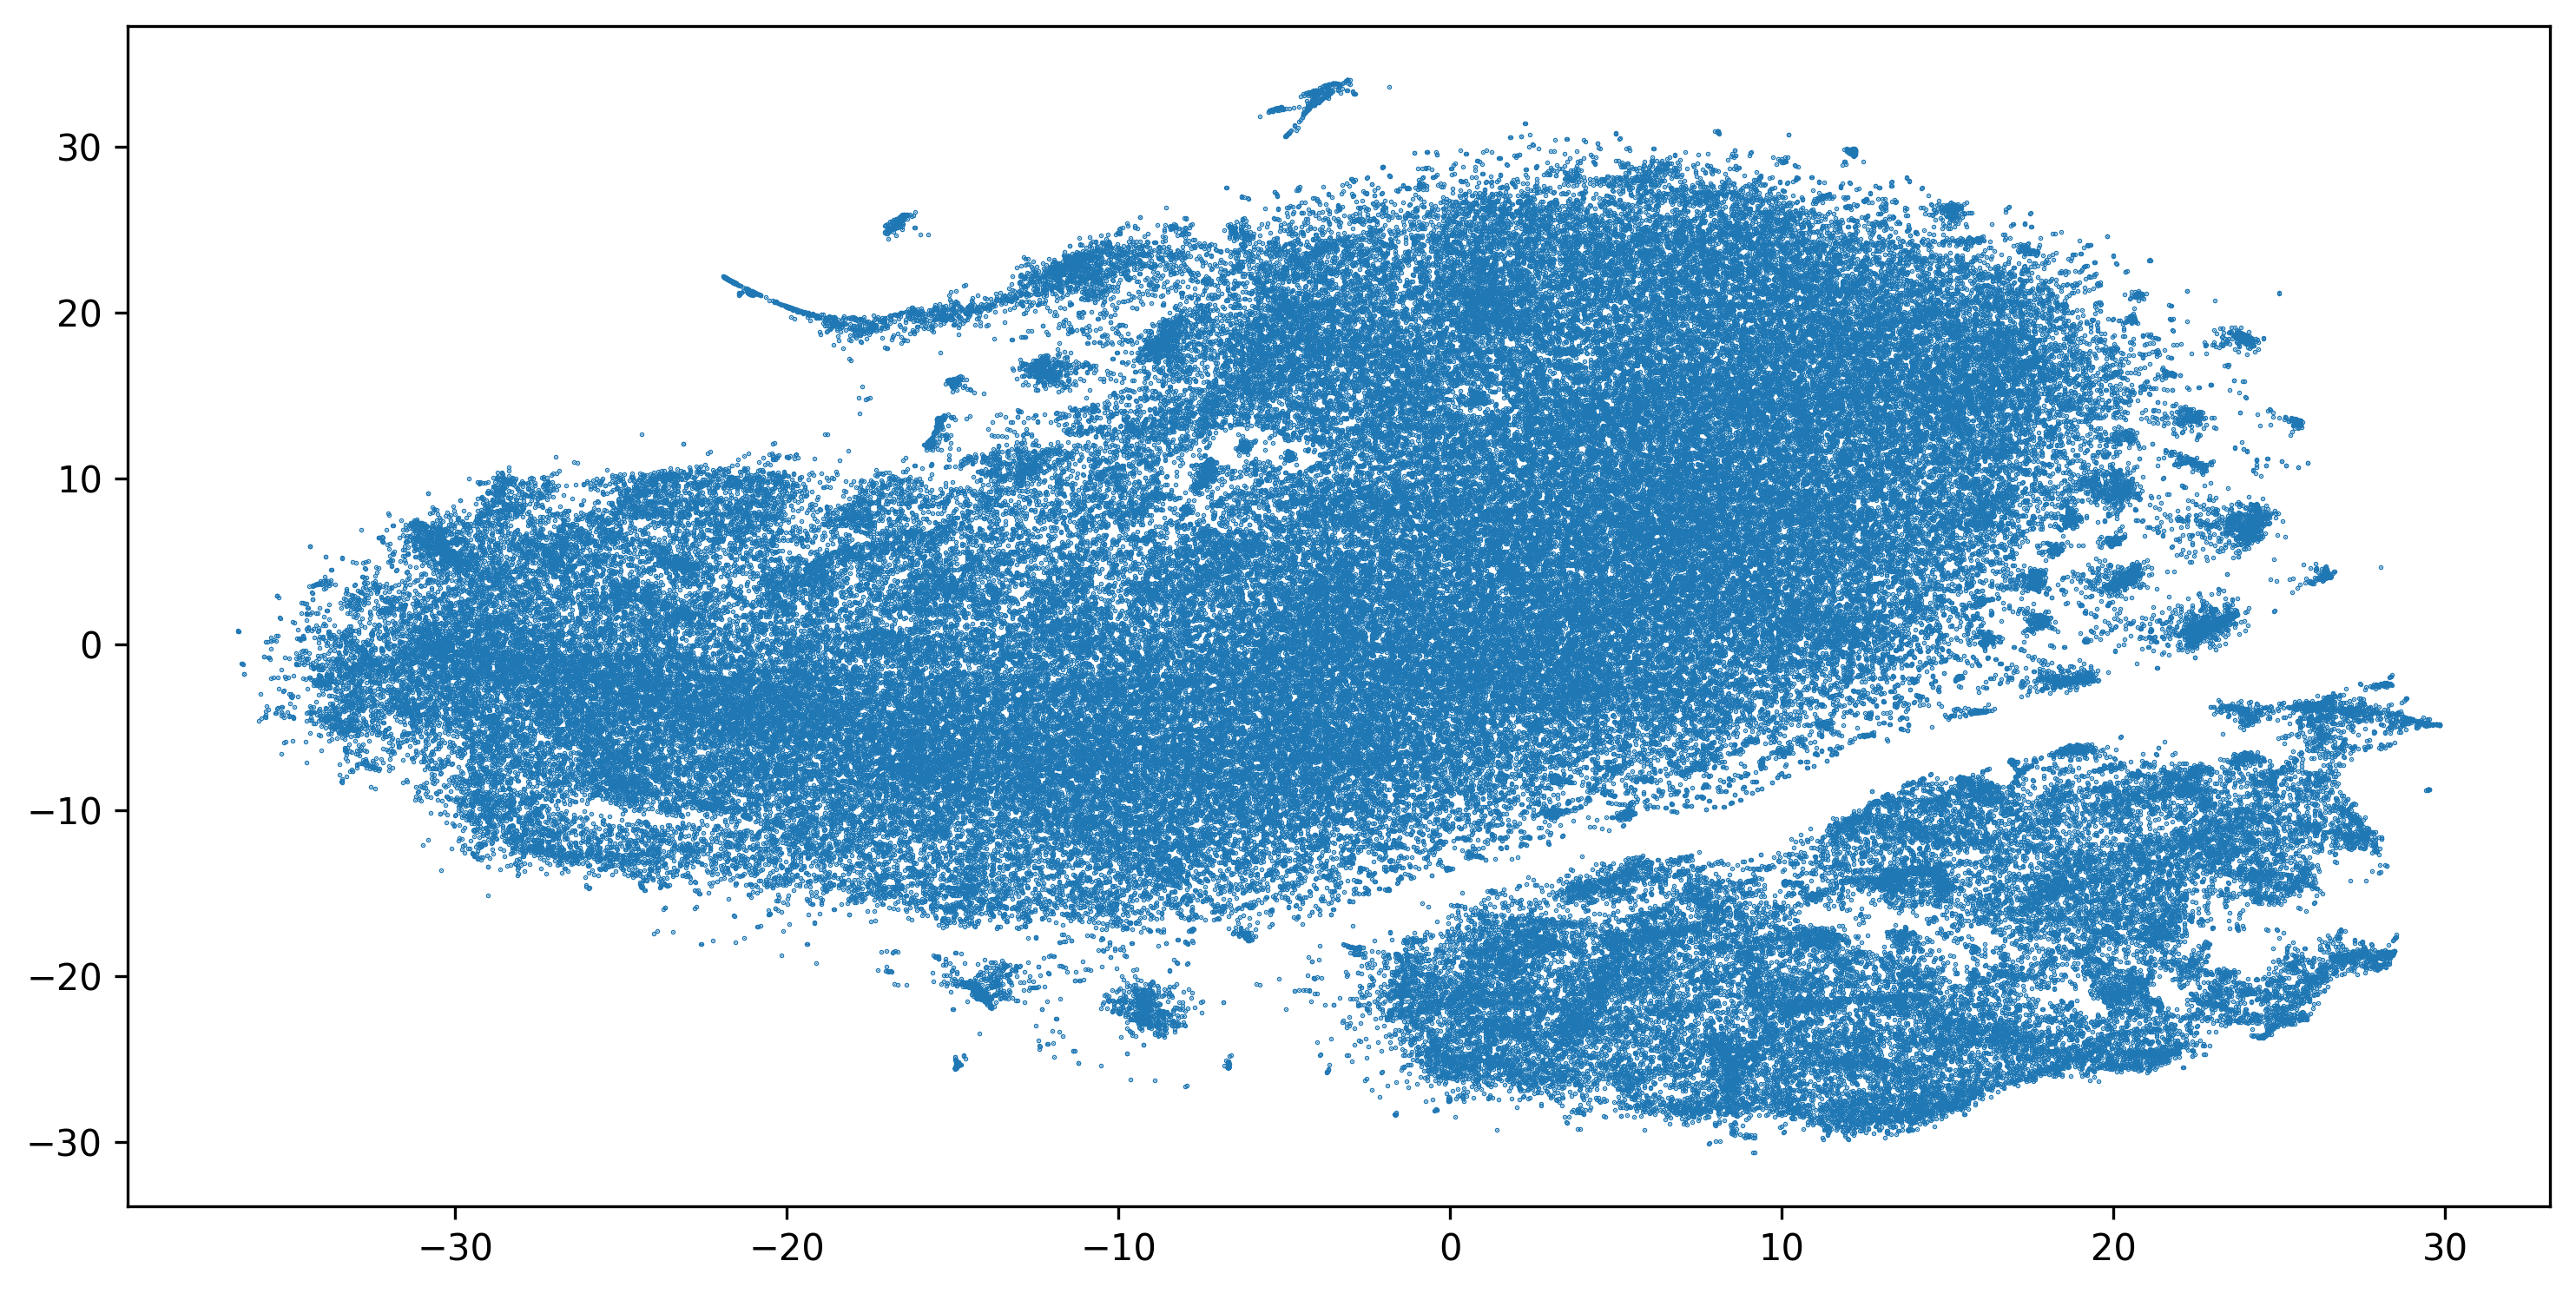

In [37]:
# рисуем исходные данные
fig=plt.figure(figsize=(12,6), dpi=300)
plt.scatter(x, y, s=0.1)
plt.show()

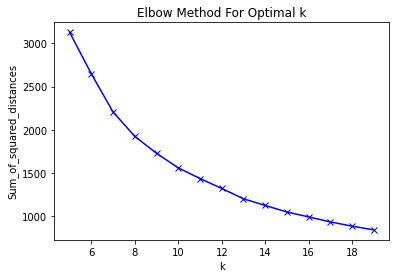

In [44]:
# use elbow method to identify k
mms = MinMaxScaler()
mms.fit(vector_embedded)
data_transformed = mms.transform(vector_embedded)
Sum_of_squared_distances = []
K = range(5, 20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [45]:
optimal_num_clusters = 13

In [46]:
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0).fit(vector_embedded).predict(vector_embedded)
print(kmeans)

[ 5  4  8 ... 11  0  7]


In [47]:
centers = KMeans(n_clusters=optimal_num_clusters, random_state=0).fit(vector_embedded)
centers = centers.cluster_centers_

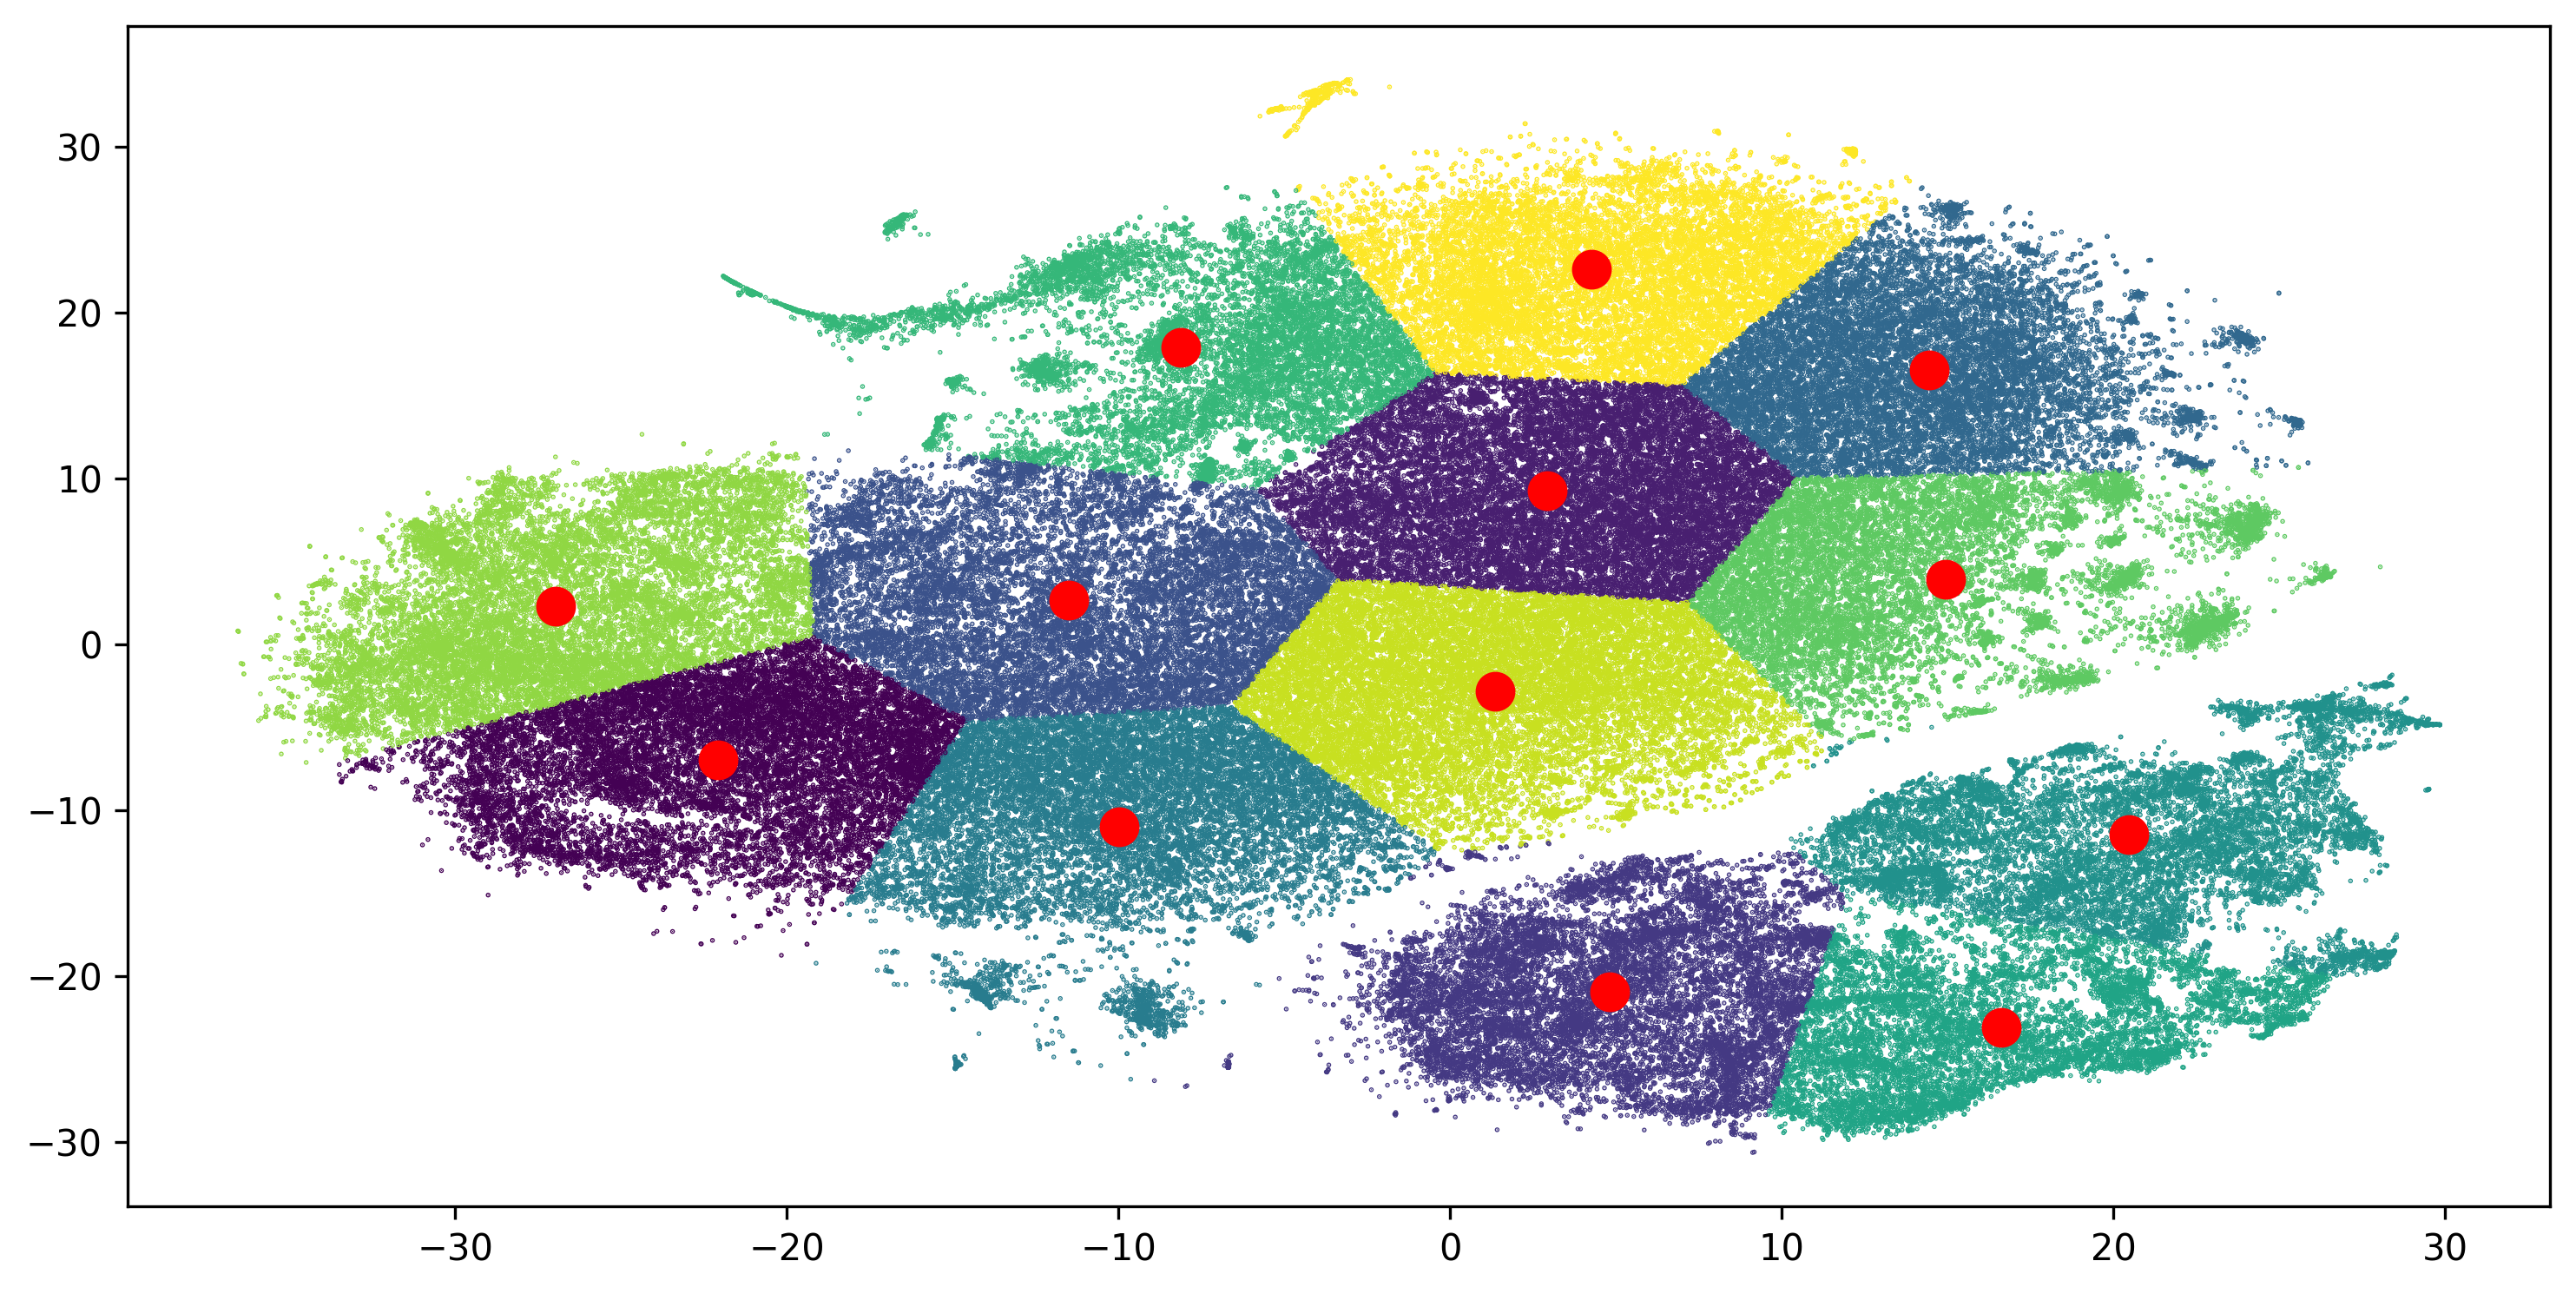

In [48]:
fig=plt.figure(figsize=(12,6), dpi=300)
plt.scatter(x, y, s=0.1, c=kmeans)
for pt in centers:
    plt.plot(pt[0], pt[1], 'ro', markersize=10)
plt.show()